In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [7]:
df = pd.read_csv("Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.shape

(150, 6)

In [11]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
grouped_iris  = df.groupby('Species', as_index= False)['Id'].count()
grouped_iris

,Species,Id
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


**Some visualizations**

**Relationship between the Sepal Length and Width using scatter plot**

Text(0.5, 1.0, 'Relationship between Sepal Length and Width')

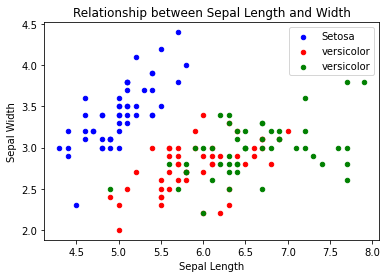

In [14]:
ax = df[df['Species'] == 'Iris-setosa'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='blue', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='red', label='versicolor',ax=ax)
df[df.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='green', label='versicolor',ax=ax)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_title("Relationship between Sepal Length and Width")

**Similarly for Petal using the seaborn function**

Text(0.5, 1.0, 'Relationship between Petal Length and Width')

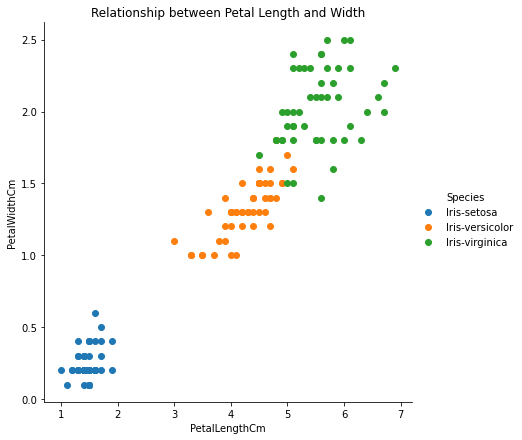

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.FacetGrid(df, hue="Species", height=6) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()
plt.title("Relationship between Petal Length and Width")

**Correlation between the features**

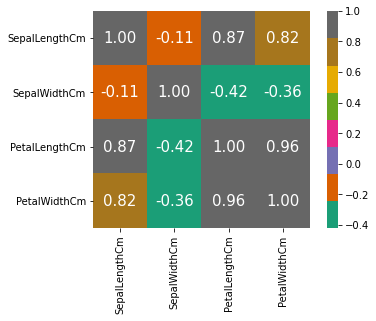

In [16]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
corr_matx = df[cols].corr()
heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')

**From the above matrix it is seen that Petal Length and Width show a strong coorelation whereas the Sepal Length and Width show weak correlations, it indicates that the Species can be identified better using Petal compared to Sepal,we will verify the same using Machine Learning**

**Machine Learning with IRIS data**

In [17]:
petals = np.array(df[["PetalLengthCm","PetalWidthCm"]])
# petals
sepals = np.array(df[["SepalLengthCm","SepalWidthCm"]])
# sepals
key = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
Y = df['Species'].map(key)
# Y

In [26]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(sepals,Y,test_size=0.2,random_state=42)

X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(petals,Y,test_size=0.2,random_state=42)

**Standardizing and Scaling the features**

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train_S)
X_train_std_S = scaler.transform(X_train_S)
X_test_std_S = scaler.transform(X_test_S)

scaler.fit(X_train_P)
X_train_std_P = scaler.transform(X_train_P)
X_test_std_P = scaler.transform(X_test_P)


print('Standardized features for Sepal and Petal \n')
print("Sepal\n\n" +str(X_train_std_S[:3]))
print("\nPetal\n\n" +str(X_train_std_P[:3]))

Standardized features for Sepal and Petal 

Sepal

[[-1.47393679  1.22037928]
 [-0.13307079  3.02001693]
 [ 1.08589829  0.09560575]]

Petal

[[-1.5639872  -1.30948358]
 [-1.27728011 -1.04292204]
 [ 0.38562104  0.28988568]]


**Logistic Reggression**

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(X_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(X_test_std_S, y_test_S)))

model.fit(X_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(X_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(X_test_std_P, y_test_P)))

Training Accuracy Sepal = 0.7916666666666666
Testing  Accuracy Sepal = 0.9

Training Accuracy Petal = 0.9416666666666667
Testing  Accuracy Petal = 1.0


**Decision Tree Classifier**

In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',max_depth=4)
model.fit(X_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(X_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(X_test_std_S, y_test_S)))

model.fit(X_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(X_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(X_test_std_P, y_test_P)))

Training Accuracy Sepal = 0.8083333333333333
Testing  Accuracy Sepal = 0.8333333333333334

Training Accuracy Petal = 0.975
Testing  Accuracy Petal = 1.0


**Random Forests**

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2)
model.fit(X_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(X_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(X_test_std_S, y_test_S)))

model.fit(X_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(X_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(X_test_std_P, y_test_P)))

Training Accuracy Sepal = 0.7916666666666666
Testing  Accuracy Sepal = 0.8666666666666667

Training Accuracy Petal = 0.9666666666666667
Testing  Accuracy Petal = 1.0


**Support Vector Machines**

In [31]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=10)
model.fit(X_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(X_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(X_test_std_S, y_test_S)))

model.fit(X_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(X_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(X_test_std_P, y_test_P)))

Training Accuracy Sepal = 0.775
Testing  Accuracy Sepal = 0.9333333333333333

Training Accuracy Petal = 0.95
Testing  Accuracy Petal = 1.0


C:\Users\N63422\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\N63422\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**k- Nearest Neighbours**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(X_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(X_test_std_S, y_test_S)))

model.fit(X_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(X_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(X_test_std_P, y_test_P)))

Training Accuracy Sepal = 0.8333333333333334
Testing  Accuracy Sepal = 0.8333333333333334

Training Accuracy Petal = 0.9833333333333333
Testing  Accuracy Petal = 1.0


**using the correlation scores, the Petal Length and Width are the best features to identify the species of IRIS**